### LIBRARY AND DATA IMPORTS

In [38]:
import pandas as pd
import numpy as np                            
import matplotlib.pyplot as plt          
import seaborn as sb  
from sklearn.linear_model import LinearRegression          

In [39]:
raw_df = pd.read_csv("product_dataset.csv")
raw_df.sample(3)

,prodID,main_category_x,ratings,no_of_ratings,discount_price_x,actual_price_x,name,link,image,isDarkPattern_x,main_category_y,discount_price_y,actual_price_y,isDarkPattern_y,diff_percent
645,645,appliances,3.832488,NaN,76890.0,92990.0,"Voltas 241 CZMM 2 TON Slimline AC, R-32",https://www.amazon.in/Voltas-241-CZMM-Slimline...,https://m.media-amazon.com/images/I/21bdLxbkqX...,0,NaN,NaN,NaN,NaN,NaN
398167,398167,appliances,4.100000,23,12490.0,18990.0,Onida 190 L 3 Star Direct-Cool Single Door Ref...,https://www.amazon.in/Onida-Direct-Cool-Single...,https://m.media-amazon.com/images/I/31oa1Yry7R...,0,appliances,12490.0,18990.0,0.0,34.228541
426217,426217,men's clothing,3.832488,NaN,230.0,499.0,GOLU Blue CHEAK Shirt,https://www.amazon.in/GOLU-Blue-CHEAK-Shirt/dp...,https://m.media-amazon.com/images/I/51E3aIwlz-...,0,NaN,NaN,NaN,NaN,NaN


### DATA CLEANING

In [40]:
# generate unique value for each product in 'prodID; column
raw_df["prodID"] = range(len(raw_df))
raw_df.sample(3)

,prodID,main_category_x,ratings,no_of_ratings,discount_price_x,actual_price_x,name,link,image,isDarkPattern_x,main_category_y,discount_price_y,actual_price_y,isDarkPattern_y,diff_percent
378966,378966,stores,4.000000,719,NaN,499.0,nu-Lite Formal/Casual Printed Polyester Neckti...,https://www.amazon.in/nu-Lite-Printed-Polyeste...,https://m.media-amazon.com/images/W/IMAGERENDE...,0,NaN,NaN,NaN,NaN,NaN
35380,35380,bags & luggage,3.832488,NaN,1025.19,2858.0,Homgee Portable Lightweight Outdoor Emergency ...,https://www.amazon.in/Homgee-Portable-Lightwei...,https://m.media-amazon.com/images/I/71XbvZa7aw...,0,NaN,NaN,NaN,NaN,NaN
185980,185980,men's shoes,3.832488,NaN,868.00,1599.0,Greatech Men Formal Shoes Brown,https://www.amazon.in/Greatech-Men-Formal-Shoe...,https://m.media-amazon.com/images/I/61Bts7APCa...,0,NaN,NaN,NaN,NaN,NaN


In [41]:
# handle missing values and NaN values or datatype errors
# and changing str -> int ('123' -> 123)

# ratings column
raw_df['ratings'] = pd.to_numeric(raw_df['ratings'], errors='coerce')
raw_df['ratings'] = raw_df['ratings'].fillna(raw_df['ratings'].mean())
raw_df = raw_df.astype({'ratings':'float'})

# no_of_ratings column
mask = pd.to_numeric(raw_df['no_of_ratings'], errors='coerce').notnull()
raw_df = raw_df[mask]
raw_df = raw_df.astype({'no_of_ratings':'int'})

# actual_price column
mask = pd.to_numeric(raw_df['actual_price'],errors='coerce').notnull()
raw_df = raw_df[mask]
raw_df = raw_df.astype({'actual_price':'float'})

# discount_price column
mask = pd.to_numeric(raw_df['discount_price'],errors='coerce').notnull()
raw_df = raw_df[mask]
raw_df = raw_df.astype({'discount_price':'float'})

KeyError: 'actual_price'

In [ ]:
# df1 to be used as primary dataframe for this model
df1 = raw_df
df1 = df1.drop(columns=['main_category','discount_price','actual_price','name','link','image'], axis=1)
df1.sample(3)

,prodID,ratings,no_of_ratings,isDarkPattern
223119,223119,5.0,1,0
497460,497460,4.6,4,0
82168,82168,4.3,14,0


In [ ]:
# EDA on 'no_of_ratings'
df1['no_of_ratings'].describe()

count    334963.000000
mean        853.864540
std        8890.977903
min           1.000000
25%           4.000000
50%          20.000000
75%         131.000000
max      589547.000000
Name: no_of_ratings, dtype: float64

In [ ]:
# EDA on 'ratings'
df1['ratings'].describe()

count    334963.000000
mean          3.814368
std           0.754169
min           1.000000
25%           3.500000
50%           3.900000
75%           4.200000
max           5.000000
Name: ratings, dtype: float64

In [ ]:
# trying to find pattern or correlation
# 1) Scatter Plot
# 2) Correlation Coefficient
# 3) Regression Analysis

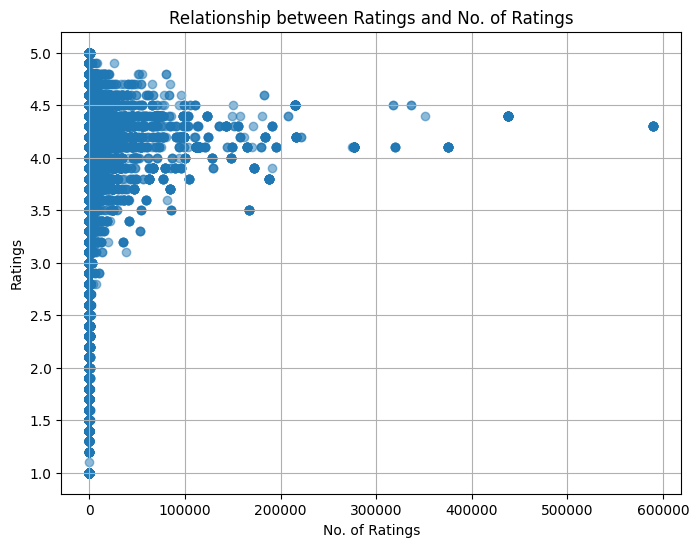

In [ ]:
# scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df1['no_of_ratings'], df1['ratings'], alpha=0.5)
plt.title('Relationship between Ratings and No. of Ratings')
plt.xlabel('No. of Ratings')
plt.ylabel('Ratings')
plt.grid(True)
plt.show()

In [ ]:
# correlation coefficient
correlation = df1['no_of_ratings'].corr(df1['ratings'])
print(f"Correlation Coefficient: {correlation}")


Correlation Coefficient: 0.040749485695461884


In [ ]:
# regression analysis 
X = df1[['no_of_ratings']]
y = df1['ratings']
model = LinearRegression()
model.fit(X, y)

print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")


Coefficient: 3.4565393803826975e-06
Intercept: 3.8114161406048286


In [ ]:
# correlation coefficient and regression analysis are not 
# showing good results, But the scatter plot paints a good picture

In [ ]:
# Outlier removal
def isOutlier(value, threshold):
    return value > threshold

def remove_outliers(df, column_name, threshold):
    df_cleaned = df[~df[column_name].apply(lambda x: isOutlier(x, threshold))]
    return df_cleaned

df1 = remove_outliers(df1, 'no_of_ratings', 100000)
df1.sample(3)


,prodID,ratings,no_of_ratings,isDarkPattern
436498,436498,4.2,20,0
97727,97727,3.9,88,0
152790,152790,3.6,15,0


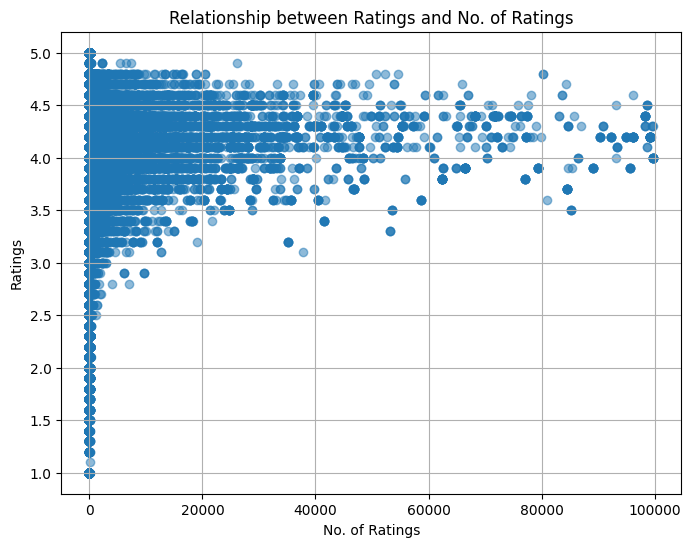

In [ ]:
# scatter plot after removing the outliers
plt.figure(figsize=(8, 6))
plt.scatter(df1['no_of_ratings'], df1['ratings'], alpha=0.5)
plt.title('Relationship between Ratings and No. of Ratings')
plt.xlabel('No. of Ratings')
plt.ylabel('Ratings')
plt.grid(True)
plt.show()


In [ ]:
# EDA on 'no_of_ratings'
df1['no_of_ratings'].describe()

count    334568.000000
mean        611.884574
std        3798.532434
min           1.000000
25%           4.000000
50%          20.000000
75%         131.000000
max       99745.000000
Name: no_of_ratings, dtype: float64

In [ ]:
# GENERATING A 'credibility_score'

# normalizing 'ratings' between 0 and 1
normalized_ratings = (df1['ratings'] - df1['ratings'].min()) / (df1['ratings'].max() - df1['ratings'].min())
# normalizing 'num_of_ratings' between 0 and 1
normalized_num_ratings = (df1['no_of_ratings'] - df1['no_of_ratings'].min()) / (df1['no_of_ratings'].max() - df1['no_of_ratings'].min())
# custom weights for ratings and num_of_ratings
rating_weight = 0.6
num_rating_weight = 0.4
# Calculating 'credibility_score'
df1['credibility_score'] = (rating_weight * normalized_ratings + num_rating_weight * normalized_num_ratings) * 100
# adjusting the credibility_score to be within the range of 1 to 100
min_score = df1['credibility_score'].min()
max_score = df1['credibility_score'].max()
df1['credibility_score'] = 1 + (df1['credibility_score'] - min_score) * 99 / (max_score - min_score)

df1.sample(3)



,prodID,ratings,no_of_ratings,isDarkPattern,credibility_score
122110,122110,3.4,12,0,39.508674
432127,432127,4.2,13,0,52.343754
151208,151208,3.4,448,0,39.695683


In [ ]:
# EDA on 'credibility_score'
df1['credibility_score'].describe()

count    334568.000000
mean         46.406942
std          12.313819
min           1.000000
25%          41.116008
50%          47.564645
75%          53.184180
max         100.000000
Name: credibility_score, dtype: float64

In [ ]:
df1['credibility_score'].describe()
# 30 is a good cutoff linit
# distribtion ranges from 0-10-20-30....100

count    334568.000000
mean         46.406942
std          12.313819
min           1.000000
25%          41.116008
50%          47.564645
75%          53.184180
max         100.000000
Name: credibility_score, dtype: float64

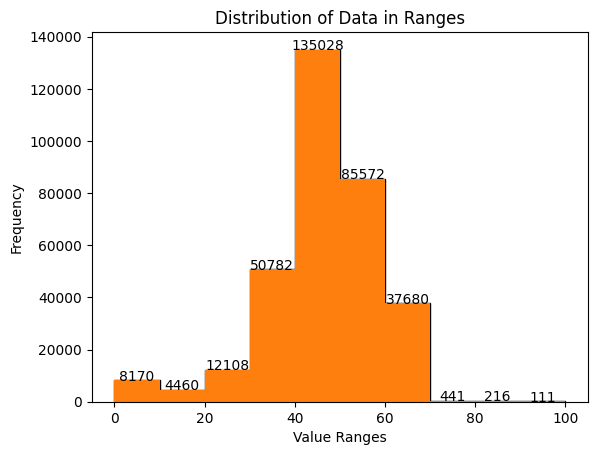

In [ ]:
# Analysis on distribution of credibility_score throughout the data

# defining bins for the ranges (0-10, 10-20, ..., 90-100)
bins = [i * 10 for i in range(11)]

# creating histogram using the above defined bins
plt.hist(df1['credibility_score'], bins=bins, edgecolor='black')
plt.xlabel('Value Ranges')
plt.ylabel('Frequency')
plt.title('Distribution of Data in Ranges')
for i, v in enumerate(plt.hist(df1['credibility_score'], bins=bins)[0]):
    plt.text(bins[i] + 5, v + 0.5, str(int(v)), color='black', ha='center')
plt.show()

In [ ]:
"""
Total no of data entries = 334568
From the above analysis we arrived at these statistics
credibility_score from  0 - 10 = 8170 --> 2.44 %
credibility_score from 10 - 20 = 4460 --> 1.33 %
credibility_score from 20 - 30 = 12108 --> 3.61 %
credibility_score from 30 - 40 = 50782 --> 15.17 %
credibility_score from 40 - 50 = 135028 --> 40.35 %
credibility_score from 50 - 60 = 85572 --> 25.57 %
credibility_score from 60 - 70 = 37680 --> 11.26 %
credibility_score from 70 - 80 = 441 --> 0.0013 %
credibility_score from 80 - 90 = 216 --> 0.0007 %
credibility_score from 90 - 100 = 111 --> 0.00033 %

From here we can see the first three data ranges {0-10, 10-20, 20-30} have very less credibility_score. 
So, according to our convenience, THE MINIMUM THRESHOLD FOR A TRUSTWORTHY PRODUCT, credibility_score SHOULD BE ATLEAST 30

"""

'\nTotal no of data entries = 334568\nFrom the above analysis we arrived at these statistics\ncredibility_score from  0 - 10 = 8170 --> 2.44 %\ncredibility_score from 10 - 20 = 4460 --> 1.33 %\ncredibility_score from 20 - 30 = 12108 --> 3.61 %\ncredibility_score from 30 - 40 = 50782 --> 15.17 %\ncredibility_score from 40 - 50 = 135028 --> 40.35 %\ncredibility_score from 50 - 60 = 85572 --> 25.57 %\ncredibility_score from 60 - 70 = 37680 --> 11.26 %\ncredibility_score from 70 - 80 = 441 --> 0.0013 %\ncredibility_score from 80 - 90 = 216 --> 0.0007 %\ncredibility_score from 90 - 100 = 111 --> 0.00033 %\n\nFrom here we can see the first three data ranges {0-10, 10-20, 20-30} have very less credibility_score. \nSo, according to our convenience, THE MINIMUM THRESHOLD FOR A TRUSTWORTHY PRODUCT, credibility_score SHOULD BE ATLEAST 30\n\n'

In [ ]:
# creating bins for ranging the data
bins = [i * 10 for i in range(11)]
# sorting the dataframe by 'credibility_score'
df_sorted = df1.sort_values('credibility_score')

# to show tables for each data range
for i in range(len(bins)-1):
    score_range = f"{bins[i]}-{bins[i+1]}"
    subset = df_sorted[(df_sorted['credibility_score'] >= bins[i]) & (df_sorted['credibility_score'] < bins[i+1])]
    
    if not subset.empty:
        print(f"Table for Score Range: {score_range}")
        display(subset[['credibility_score', 'ratings', 'no_of_ratings']])
        print("\n")



Table for Score Range: 0-10


,credibility_score,ratings,no_of_ratings
324582,1.000000,1.0,1
277377,1.000000,1.0,1
71495,1.000000,1.0,1
223173,1.000000,1.0,1
176183,1.000000,1.0,1
...,...,...,...
503843,9.025089,1.5,9
44859,9.025089,1.5,9
408986,9.027662,1.5,15
383534,9.052540,1.5,73




Table for Score Range: 10-20


,credibility_score,ratings,no_of_ratings
486791,10.626418,1.6,2
410475,10.626418,1.6,2
320631,10.626418,1.6,2
384220,10.626418,1.6,2
299540,10.626418,1.6,2
...,...,...,...
392308,18.680673,2.1,78
86195,18.680673,2.1,78
392242,18.680673,2.1,78
89289,18.680673,2.1,78




Table for Score Range: 20-30


,credibility_score,ratings,no_of_ratings
285805,20.252407,2.2,2
410962,20.252407,2.2,2
70928,20.252407,2.2,2
93161,20.252407,2.2,2
418398,20.252407,2.2,2
...,...,...,...
390802,29.968898,2.8,213
237216,29.971471,2.8,219
376689,29.984768,2.8,250
427255,29.988199,2.8,258




Table for Score Range: 30-40


,credibility_score,ratings,no_of_ratings
405920,30.003211,2.8,293
71497,30.003211,2.8,293
409873,30.003211,2.8,293
409874,30.003211,2.8,293
72149,30.003211,2.8,293
...,...,...,...
20971,39.995069,3.4,1146
4228,39.996355,3.4,1149
263948,39.998071,3.4,1153
66012,39.998071,3.4,1153




Table for Score Range: 40-50


,credibility_score,ratings,no_of_ratings
194378,40.000645,3.4,1159
28524,40.001931,3.4,1162
105091,40.001931,3.4,1162
130648,40.001931,3.4,1162
317235,40.007078,3.4,1174
...,...,...,...
387734,49.998507,4.0,2026
468849,49.998936,4.0,2027
456048,49.998936,4.0,2027
114636,49.999365,4.0,2028




Table for Score Range: 50-60


,credibility_score,ratings,no_of_ratings
38535,50.000223,4.0,2030
15077,50.001938,4.0,2034
104643,50.001938,4.0,2034
14408,50.001938,4.0,2034
130474,50.001938,4.0,2034
...,...,...,...
127088,59.993624,4.5,6627
32801,59.993624,4.5,6627
32384,59.993624,4.5,6627
32411,59.994482,4.5,6629




Table for Score Range: 60-70


,credibility_score,ratings,no_of_ratings
415368,60.000659,4.6,2903
78929,60.000659,4.6,2903
66353,60.000659,4.6,2903
27324,60.004776,4.5,6653
255066,60.005720,4.3,14136
...,...,...,...
12026,69.911107,4.0,48451
11929,69.911107,4.0,48451
12186,69.911107,4.0,48451
70676,69.928435,4.1,44751




Table for Score Range: 70-80


,credibility_score,ratings,no_of_ratings
85186,70.044673,4.1,45022
374390,70.044673,4.1,45022
26467,70.045530,4.1,45024
19119,70.071523,4.5,30123
20066,70.071523,4.5,30123
...,...,...,...
241353,79.444535,4.4,55716
409674,79.504498,4.6,48375
14530,79.796678,4.4,56537
13705,79.796678,4.4,56537




Table for Score Range: 80-90


,credibility_score,ratings,no_of_ratings
506536,80.032069,4.1,68307
107069,80.056775,4.5,53403
259933,80.281872,4.7,46447
26595,80.290365,4.4,57688
11858,80.352215,4.2,65313
...,...,...,...
255746,88.738368,4.4,77384
13788,88.738368,4.4,77384
20492,88.738368,4.4,77384
12367,89.123281,4.0,93243




Table for Score Range: 90-100


,credibility_score,ratings,no_of_ratings
12677,90.284453,4.3,84729
12516,90.284453,4.3,84729
14019,90.284453,4.3,84729
12464,90.284453,4.3,84729
440607,90.418190,4.5,77560
...,...,...,...
11639,97.706652,4.4,98293
12626,99.449095,4.5,98615
11823,99.449095,4.5,98615
11749,99.449095,4.5,98615


In [ ]:
# After having a look at the credibility_score vs ratings vs num_of_ratings. 
# The minimum requirement to not be dark pattern (that doesnt misguide user) is THRESHOLD
# Here, THRESHOLD = 30

In [ ]:
# FINALIZED FUNCTION
"""
def calculate_credibility_score(ratings, num_of_ratings):
    rating_weight = 0.6
    num_rating_weight = 0.4
    normalized_ratings = (ratings - 0) / (5 - 0) if 0 <= ratings <= 5 else 0
    normalized_num_ratings = (num_of_ratings - 0) / (1000 - 0) if 0 <= num_of_ratings <= 1000 else 0

    credibility_score = (rating_weight * normalized_ratings + num_rating_weight * normalized_num_ratings) * 100
    credibility_score = max(1, min(credibility_score, 100))
    return credibility_score

def isCredible(ratings_input, num_of_ratings_input):
    THRESHOLD = 30
    if (calculate_credibility_score(ratings_input, num_of_ratings_input) >= THRESHOLD):
        return 1
    else:
        return 0   
"""

'\ndef calculate_credibility_score(ratings, num_of_ratings):\n    rating_weight = 0.6\n    num_rating_weight = 0.4\n    normalized_ratings = (ratings - 0) / (5 - 0) if 0 <= ratings <= 5 else 0\n    normalized_num_ratings = (num_of_ratings - 0) / (1000 - 0) if 0 <= num_of_ratings <= 1000 else 0\n\n    credibility_score = (rating_weight * normalized_ratings + num_rating_weight * normalized_num_ratings) * 100\n    credibility_score = max(1, min(credibility_score, 100))\n    return credibility_score\n\ndef isCredible(ratings_input, num_of_ratings_input):\n    THRESHOLD = 30\n    if (calculate_credibility_score(ratings_input, num_of_ratings_input) >= THRESHOLD):\n        return 1\n    else:\n        return 0   \n'